In [2919]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [2920]:
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [2921]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2922]:
data = pd.read_csv('https://github.com/AnonymousCITK/ProjectML/raw/main/heart_disease.csv')
# print(data.shape)
# data.head(100)
data.tail(100)


,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Target
4138,1,67,1,25.0,0.0,0,1,0,221.0,144.0,84.0,24.92,72.0,73.0,0
4139,0,53,0,0.0,NaN,0,0,0,252.0,122.5,75.5,25.29,75.0,71.0,0
4140,1,49,1,10.0,0.0,0,0,0,305.0,135.0,82.0,26.29,84.0,65.0,0
4141,1,48,0,0.0,0.0,0,0,0,206.0,118.0,81.0,28.13,72.0,87.0,0
4142,1,47,1,20.0,0.0,0,1,0,234.0,162.0,110.0,27.51,80.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [2923]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4209 non-null   float64
 4   BPMeds           4185 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  Target           4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


In [2924]:
data.columns

Index(['Gender', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'Target'],
      dtype='object')

In [2925]:
data.describe()

,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Target
count,4238.000000,4238.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [2926]:
data.isna().sum()

Gender               0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
Target               0
dtype: int64

In [2927]:
data['Target'].value_counts()

0    3594
1     644
Name: Target, dtype: int64

In [2928]:
data=data.dropna()
data.isna().sum()

Gender             0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
Target             0
dtype: int64

In [2929]:
data.describe()

,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Target
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,0.445185,49.578821,0.488397,9.005335,0.030408,0.005601,0.311816,0.027207,236.952787,132.365964,82.933716,25.809651,75.703921,81.883169,0.152574
std,0.497053,8.569322,0.499932,11.922440,0.171730,0.074643,0.463297,0.162709,44.610417,22.051951,11.933321,4.065894,11.957763,23.888039,0.359624
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.090000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [2930]:
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data) , columns = data.columns)
print(data)
# print(data.isna().sum())
# print(data)
# data.tail()
# print(scaler.n_features_in_)

      Gender       age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0        1.0  0.184211            0.0    0.000000     0.0              0.0   
1        0.0  0.368421            0.0    0.000000     0.0              0.0   
2        1.0  0.421053            1.0    0.285714     0.0              0.0   
3        0.0  0.763158            1.0    0.428571     0.0              0.0   
4        0.0  0.368421            1.0    0.328571     0.0              0.0   
...      ...       ...            ...         ...     ...              ...   
3744     1.0  0.684211            0.0    0.000000     0.0              0.0   
3745     1.0  0.947368            0.0    0.000000     0.0              0.0   
3746     1.0  0.473684            1.0    0.014286     0.0              0.0   
3747     1.0  0.500000            1.0    0.614286     0.0              0.0   
3748     0.0  0.526316            0.0    0.000000     0.0              0.0   

      prevalentHyp  diabetes   totChol     sysBP     diaBP     

In [2931]:
data.columns
# data.describe()

Index(['Gender', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'Target'],
      dtype='object')

In [2932]:
X = data.drop('Target', axis=1)
Y = data['Target']
print(X.shape[1])
print(X.columns)

14
Index(['Gender', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')


In [2933]:
scaler = MinMaxScaler(feature_range=(0,1))
X = pd.DataFrame(scaler.fit_transform(X) , columns = X.columns)
print(X)

      Gender       age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0        1.0  0.184211            0.0    0.000000     0.0              0.0   
1        0.0  0.368421            0.0    0.000000     0.0              0.0   
2        1.0  0.421053            1.0    0.285714     0.0              0.0   
3        0.0  0.763158            1.0    0.428571     0.0              0.0   
4        0.0  0.368421            1.0    0.328571     0.0              0.0   
...      ...       ...            ...         ...     ...              ...   
3744     1.0  0.684211            0.0    0.000000     0.0              0.0   
3745     1.0  0.947368            0.0    0.000000     0.0              0.0   
3746     1.0  0.473684            1.0    0.014286     0.0              0.0   
3747     1.0  0.500000            1.0    0.614286     0.0              0.0   
3748     0.0  0.526316            0.0    0.000000     0.0              0.0   

      prevalentHyp  diabetes   totChol     sysBP     diaBP     

<Axes: ylabel='Target'>

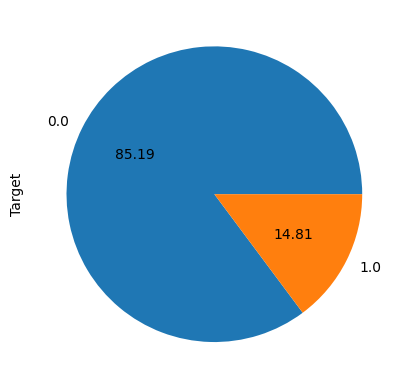

In [2934]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.22, random_state=42)
y_train.value_counts().plot.pie(autopct = '%.2f')

In [2935]:
print(X.shape, x_train.shape, x_test.shape)

(3749, 14) (824, 14) (2925, 14)


In [2936]:
print("Before balancing:")
print("Class 0 (Negative):", sum(y_train == 0))
print("Class 1 (Positive):", sum(y_train == 1))

Before balancing:
Class 0 (Negative): 702
Class 1 (Positive): 122


In [2937]:
sm = SMOTE(random_state=42)
x_train, y_train = sm.fit_resample(x_train, y_train)

In [2938]:
print("\nAfter balancing:")
print("Class 0 (Negative):", sum(y_train == 0))
print("Class 1 (Positive):", sum(y_train == 1))


After balancing:
Class 0 (Negative): 702
Class 1 (Positive): 702


<Axes: ylabel='Target'>

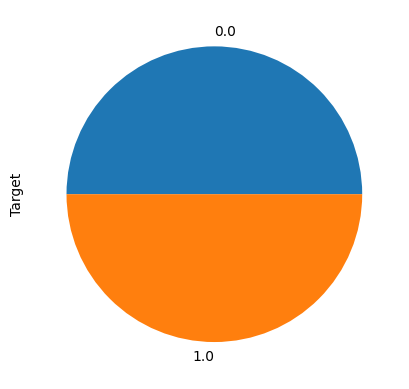

In [2939]:
y_train.value_counts().plot.pie() #autopct = '%.2f'

In [2940]:
print(X.shape, x_train.shape[0], x_test.shape[0], )

(3749, 14) 1404 2925


In [2941]:
data['Target'].value_counts()

0.0    3177
1.0     572
Name: Target, dtype: int64

In [2942]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Logistic Regression

In [2943]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [2944]:
y_pred = model.predict(x_test)

In [2945]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Model Performance:
Accuracy: 0.6629059829059829
Precision: 0.27441077441077444
Recall: 0.7244444444444444
F1 Score: 0.3980463980463981


In [2946]:
confusion_matrix(y_test, y_pred)

array([[1613,  862],
       [ 124,  326]])

In [2947]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.3370940170940171
Mean Squared Error: 0.3370940170940171
Root Mean Squared Error: 0.580597982337191
R-squared: -1.5894949494949495


#SVM(Support Vector Machine)

In [2948]:
svm_model = SVC()
svm_model.fit(x_train, y_train)

SVC()

In [2949]:
svm_pred = svm_model.predict(x_test)

In [2950]:
accuracy = accuracy_score(y_test, svm_pred)
precision = precision_score(y_test, svm_pred)
recall = recall_score(y_test, svm_pred)
f1 = f1_score(y_test, svm_pred)

print("\nModel Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Model Performance:
Accuracy: 0.6533333333333333
Precision: 0.24456521739130435
Recall: 0.6
F1 Score: 0.34749034749034746


In [2951]:
confusion_matrix(y_test, svm_pred)

array([[1641,  834],
       [ 180,  270]])

In [2952]:
mae = mean_absolute_error(y_test, svm_pred)
mse = mean_squared_error(y_test, svm_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, svm_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.3466666666666667
Mean Squared Error: 0.3466666666666667
Root Mean Squared Error: 0.5887840577551898
R-squared: -1.663030303030303


# Decision Tree

In [2953]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)


DecisionTreeClassifier()

In [2954]:
dt_pred=dt_model.predict(x_test)

In [2955]:
accuracy = accuracy_score(y_test, dt_pred)
precision = precision_score(y_test, dt_pred)
recall = recall_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)

print("\nModel Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Model Performance:
Accuracy: 0.6943589743589743
Precision: 0.21168831168831168
Recall: 0.3622222222222222
F1 Score: 0.26721311475409837


In [2956]:
confusion_matrix(y_test, dt_pred)

array([[1868,  607],
       [ 287,  163]])

In [2957]:
mae = mean_absolute_error(y_test, dt_pred)
mse = mean_squared_error(y_test, dt_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, dt_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.30564102564102563
Mean Squared Error: 0.30564102564102563
Root Mean Squared Error: 0.5528481035881607
R-squared: -1.3478787878787877


#KNN

In [2958]:
knn_model = DecisionTreeClassifier()
knn_model.fit(x_train, y_train)


DecisionTreeClassifier()

In [2959]:
knn_pred=knn_model.predict(x_test)

In [2960]:
accuracy = accuracy_score(y_test, knn_pred)
precision = precision_score(y_test, knn_pred)
recall = recall_score(y_test, knn_pred)
f1 = f1_score(y_test, knn_pred)

print("\nModel Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Model Performance:
Accuracy: 0.6882051282051282
Precision: 0.20979899497487436
Recall: 0.3711111111111111
F1 Score: 0.26805778491171744


In [2961]:
confusion_matrix(y_test, knn_pred)

array([[1846,  629],
       [ 283,  167]])

In [2962]:
mae = mean_absolute_error(y_test, knn_pred)
mse = mean_squared_error(y_test, knn_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, knn_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.3117948717948718
Mean Squared Error: 0.3117948717948718
Root Mean Squared Error: 0.5583859523616902
R-squared: -1.395151515151515


In [2963]:
DATA = [1,47,1,30,0,0,0,0,260,126,91,27.01,75,84]
print(DATA)

[1, 47, 1, 30, 0, 0, 0, 0, 260, 126, 91, 27.01, 75, 84]


In [2964]:
DATA_as_np_array = np.asarray(DATA)

#reshaping the array as prediction is only for 1 instance
DATA_reshape = DATA_as_np_array.reshape(1,-1)

std_DATA = scaler.transform(DATA_reshape)
# print(std_DATA)

Lr_pred = model.predict(std_DATA)
print("L_R= ",Lr_pred)
Svm_pred = svm_model.predict(std_DATA)
print("SVM= ",Svm_pred)
Dt_pred = dt_model.predict(std_DATA)
print("DTC= ",Dt_pred)
Knn_pred = knn_model.predict(std_DATA)
print("KNN= ",Knn_pred)

mn = int((Dt_pred + Knn_pred) / 2)
# mn = int((mn1 + mn2) / 2)
# print("Mean= ", mn)

if (mn == 1):
  print("The person have heart disease.\n")
else:
  print("The person does not have heart disease.\n")

L_R=  [1.]
SVM=  [0.]
DTC=  [0.]
KNN=  [0.]
1= 0 2= 0
The person does not have heart disease.



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
